In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
modes = [6, 8, 12]
widths = [32, 64, 128]
size = 'SMALL'
# plt.style.use('seaborn-v0_8-colorblind')

dfs = {}
min_loss_test = []
min_loss_train = {}

for loss_mode in modes:
  for width in widths:
    filename = f"losses-{size}-mode-{loss_mode}-width-{width}.csv"
    filepath = os.path.join('/groups/mlprojects/eikonal/FinalizedLosses', filename)
    try:
        df = pd.read_csv(filepath)
        df['Log Test Smooth'] = df['Log Test'].rolling(window=5).mean()
        df['Log Train Smooth'] = df['Log Train'].rolling(window=5).mean()
        dfs[loss_mode, width] = df
        min_loss_test.append([loss_mode, width, df['Log Test'].idxmin(), df['Log Test'].min(), df['Test'].min()])
        min_loss_train[loss_mode, width] = [df['Log Train'].idxmin(), df['Log Train'].min()]
    except:
        continue

columns = ["mode", "width", "epoch", "minimum log test loss", "minimum test loss"]

min_loss_df = pd.DataFrame(min_loss_test, columns=columns)
min_loss_df


,mode,width,epoch,minimum log test loss,minimum test loss
0,6,32,273,-0.478947,0.619435
1,6,64,958,-0.877569,0.415792
2,6,128,720,-1.022721,0.359615
3,8,32,491,-0.522729,0.592901
4,8,64,884,-0.827719,0.437045
5,8,128,331,-0.942087,0.389813
6,12,32,375,-0.267178,0.765537
7,12,64,856,-0.432710,0.648749
8,12,128,265,-0.479217,0.619268


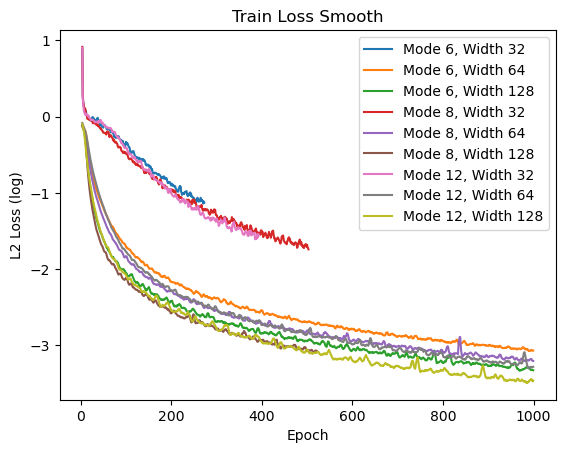

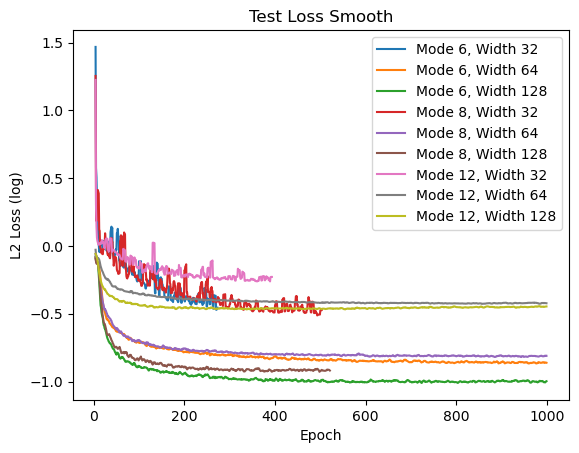

In [21]:
for mode, width in dfs:
    plt.plot(dfs[mode, width]["Log Train Smooth"])

plt.legend([f"Mode {mode}, Width {width}" for mode, width in dfs])
plt.title("Train Loss Smooth")
plt.xlabel("Epoch")
plt.ylabel("L2 Loss (log)")
plt.show()

for mode, width in dfs:
    plt.plot(dfs[mode, width]["Log Test Smooth"])

plt.legend([f"Mode {mode}, Width {width}" for mode, width in dfs])
plt.title("Test Loss Smooth")
# plt.ylim(-1, -0.3)
plt.xlabel("Epoch")
plt.ylabel("L2 Loss (log)")
plt.show()

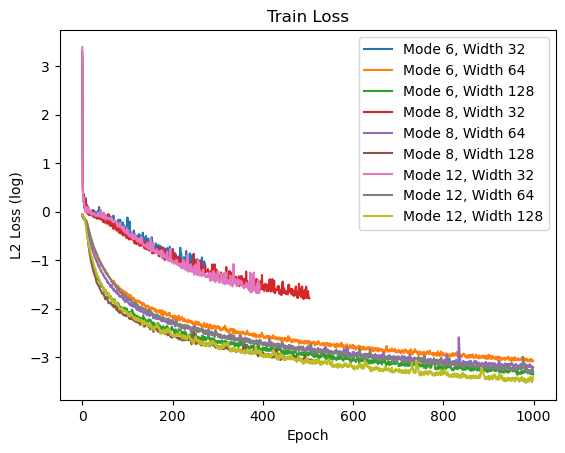

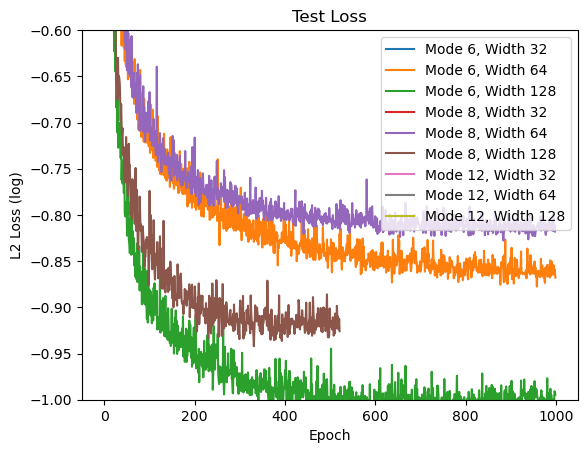

In [20]:
for mode, width in dfs:
    plt.plot(dfs[mode, width]["Log Train"])

plt.legend([f"Mode {mode}, Width {width}" for mode, width in dfs])
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("L2 Loss (log)")
plt.show()

for mode, width in dfs:
    plt.plot(dfs[mode, width]["Log Test"])

plt.legend([f"Mode {mode}, Width {width}" for mode, width in dfs])
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("L2 Loss (log)")
plt.ylim(-1, -0.6)
plt.show()